<a id="title_ID"></a>
# JWST Pipeline Validation Testing Notebook: Calwebb_Coron3 for MIRI Coronagraphic Imaging

<span style="color:red"> **Instruments Affected**</span>: MIRI, NIRCam

Tested on MIRI Simulated data

### Table of Contents
<div style="text-align: left"> 

<br>  [Introduction](#intro_ID) <br> [Imports](#imports_ID) <br> [Download Input Data](#download_dataz) <br> [Run JWST Pipeline](#pipeline_ID) <br> [Input Data Description](#indata) <br> [Examine Output Data](#examine_outdata) <br> [Testing Needed in the Near Future ](#future_testing)  <br> [About This Notebook](#about_ID) <br>


</div>

<a id="intro_ID"></a>
# Introduction

This notebook is used to test the following steps in the CALCORON3 pipeline for MIRI for pipeline version == '0.17.0':
- stack_refs 
- align_refs
- klip

Note: outlier_detection step has been changed and moved in build 0.17.1, so this step has not been tested. resample step has also not yet been tested.

The simulated psfs were generated using panCake and then the data was edited by me to make it more accurate and enable it to be fed through the JWST CALCORON3 pipeline.
- Simulated Data was generated for MIRI 1065C 4QPM.
- One target PSF with 9 reference PSFs from 9-point small grid dither.
- Target contains 2 fake companion psfs.

I use a different PSFMASK reference file from the one on CRDS, as the current ones in CRDS need to be updated.

These steps are set up with an example simulated MIRI dataset.

The pipeline documentation can be found here: https://jwst-pipeline.readthedocs.io/en/latest/

Documentation for calcoron3 can be found here: https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_coron3.html#calwebb-coron3

The pipeline code is available on GitHub: https://github.com/spacetelescope/jwst

### Defining Terms

    JWST: James Webb Space Telescope
    MIRI: Mid-Infrared Instrument
    4QPM: 4 Quadrant Phase Mask
    panCake: and in-house tool at STScI used to simulate coronagraphic PSFs.



<a id="imports_ID"></a>
## Imports

* jwst for checking the version being tested
* Coron3Pipeline is the pipeline being tested
* matplotlib.pyplot.plt to generate plot
* numpy for array calculations and manipulation
* download_file allow downloading and accessing files
* ipywidgets and (from IPython.display import display,clear_output) to display images to click through 

In [1]:
import jwst
from jwst.pipeline import Coron3Pipeline
from astropy.io import fits
from ci_watson.artifactory_helpers import get_bigdata
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file

# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 

import numpy as np
import ipywidgets as widgets
from IPython.display import display,clear_output
import os

2020-12-09 17:01:24,666 - stpipe - INFO - Generating new fontManager, this may take some time...


In [2]:
jwst.__version__
# should out '0.17.0'

'0.17.1'

<a id="download_dataz"></a>
## Download Input Data

Here we download the data which is hosted publicly on Box

In [3]:
# new PSFMASK file

psf_mask_dir = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'jwst_miri_psfmask_0001_new.fits')


In [4]:
# download target psf file

target_psf_fn = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_targ.fits')


In [5]:
# download reference psf files
    
new_ref_0 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_0.fits')

new_ref_1 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_1.fits')

new_ref_2 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_2.fits')

new_ref_3 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_3.fits')

new_ref_4 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_4.fits')

new_ref_5 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_5.fits')

new_ref_6 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_6.fits')

new_ref_7 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_7.fits')
             
new_ref_8 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'calwebb_coron3',
                     'coron3_miri_test', 
                     'new_ref_8.fits')

<a id="pipeline_ID"></a>
## Run JWST Pipeline

In [6]:
asn_dir = 'test.yml'
myCoron3Pipeline = Coron3Pipeline()
myCoron3Pipeline.save_results = True
myCoron3Pipeline.align_refs.override_psfmask = psf_mask_dir
myCoron3Pipeline.output_dir = os.getcwd() 
myCoron3Pipeline.resample.skip = True
myCoron3Pipeline.run(asn_dir)

2020-12-09 17:01:27,011 - stpipe.Coron3Pipeline - INFO - Coron3Pipeline instance created.


2020-12-09 17:01:27,012 - stpipe.Coron3Pipeline.stack_refs - INFO - StackRefsStep instance created.


2020-12-09 17:01:27,014 - stpipe.Coron3Pipeline.align_refs - INFO - AlignRefsStep instance created.


2020-12-09 17:01:27,016 - stpipe.Coron3Pipeline.klip - INFO - KlipStep instance created.


2020-12-09 17:01:27,018 - stpipe.Coron3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.


2020-12-09 17:01:27,021 - stpipe.Coron3Pipeline.resample - INFO - ResampleStep instance created.


2020-12-09 17:01:27,156 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline running with args ('test.yml',).


2020-12-09 17:01:27,163 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'steps': {'stack_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'align_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''

2020-12-09 17:01:27,165 - stpipe.Coron3Pipeline - INFO - Starting calwebb_coron3 ...


202012091701:DEBUG:jwst.associations.association_io.load:Error unserializing: "Expecting property name enclosed in double quotes: line 12 column 11 (char 316)"


2020-12-09 17:01:28,393 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_8.fits' reftypes = []


2020-12-09 17:01:28,396 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:28,816 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_7.fits' reftypes = []


2020-12-09 17:01:28,819 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:29,108 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_6.fits' reftypes = []


2020-12-09 17:01:29,110 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:29,401 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_5.fits' reftypes = []


2020-12-09 17:01:29,403 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:29,698 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_4.fits' reftypes = []


2020-12-09 17:01:29,700 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:29,993 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_3.fits' reftypes = []


2020-12-09 17:01:29,995 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:30,389 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_2.fits' reftypes = []


2020-12-09 17:01:30,391 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:30,686 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_1.fits' reftypes = []


2020-12-09 17:01:30,688 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:30,979 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_ref_0.fits' reftypes = []


2020-12-09 17:01:30,981 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:31,273 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'new_targ.fits' reftypes = []


2020-12-09 17:01:31,276 - stpipe.Coron3Pipeline - INFO - Override for PSFMASK reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits'.


2020-12-09 17:01:34,087 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_8.fits>,).


2020-12-09 17:01:34,090 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,102 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,103 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,104 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,186 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_7.fits>,).


2020-12-09 17:01:34,188 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,200 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,200 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,202 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,281 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_6.fits>,).


2020-12-09 17:01:34,284 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,295 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,296 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,298 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,389 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_5.fits>,).


2020-12-09 17:01:34,392 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,403 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,404 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,405 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,490 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_4.fits>,).


2020-12-09 17:01:34,492 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,503 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,504 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,505 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,593 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_3.fits>,).


2020-12-09 17:01:34,595 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,606 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,607 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,609 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,689 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_2.fits>,).


2020-12-09 17:01:34,692 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,703 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,707 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,708 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,790 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_1.fits>,).


2020-12-09 17:01:34,792 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,804 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,805 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,806 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,890 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_ref_0.fits>,).


2020-12-09 17:01:34,893 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:34,904 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:34,906 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:34,907 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:34,988 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs running with args (<ModelContainer>,).


2020-12-09 17:01:34,990 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2020-12-09 17:01:34,997 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 1 to output stack


2020-12-09 17:01:34,999 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 2 to output stack


2020-12-09 17:01:35,001 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 3 to output stack


2020-12-09 17:01:35,003 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 4 to output stack


2020-12-09 17:01:35,005 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 5 to output stack


2020-12-09 17:01:35,007 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 6 to output stack


2020-12-09 17:01:35,009 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 7 to output stack


2020-12-09 17:01:35,011 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 8 to output stack


2020-12-09 17:01:35,013 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 9 to output stack


2020-12-09 17:01:35,043 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs done


2020-12-09 17:01:35,175 - stpipe.Coron3Pipeline - INFO - Saved model in /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jw10005-miri-mask1065_psfstack.fits


2020-12-09 17:01:35,626 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(1, 224, 288) from new_targ.fits>,).


2020-12-09 17:01:35,629 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False}


2020-12-09 17:01:35,641 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Input only contains 1 integration


2020-12-09 17:01:35,641 - stpipe.Coron3Pipeline.outlier_detection - WARNING - Outlier detection step will be skipped


2020-12-09 17:01:35,643 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2020-12-09 17:01:35,730 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs running with args (<CubeModel(1, 224, 288) from new_targ.fits>, <CubeModel(9, 224, 288) from jw10005-miri-mask1065_psfstack.fits>).


2020-12-09 17:01:35,733 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 4}


2020-12-09 17:01:35,745 - stpipe.Coron3Pipeline.align_refs - INFO - Using PSFMASK reference file /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jwst_miri_psfmask_0001_new.fits


2020-12-09 17:01:37,567 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs done


2020-12-09 17:01:37,672 - stpipe.Coron3Pipeline - INFO - Saved model in /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/new_targ_c1001_psfalign.fits


2020-12-09 17:01:37,774 - stpipe.Coron3Pipeline.klip - INFO - Step klip running with args (<CubeModel(1, 224, 288) from new_targ.fits>, <QuadModel(1, 9, 224, 288) from new_targ_c1001_psfalign.fits>).


2020-12-09 17:01:37,776 - stpipe.Coron3Pipeline.klip - INFO - Step klip parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'truncate': 50}


2020-12-09 17:01:37,788 - stpipe.Coron3Pipeline.klip - INFO - KL transform truncation = 50


2020-12-09 17:01:38,058 - stpipe.Coron3Pipeline.klip - INFO - Step klip done


2020-12-09 17:01:38,293 - stpipe.Coron3Pipeline - INFO - Saved model in /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/new_targ_c1001_psfsub.fits


2020-12-09 17:01:38,497 - stpipe.Coron3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).


2020-12-09 17:01:38,500 - stpipe.Coron3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'exptime', 'single': False, 'blendheaders': False}


2020-12-09 17:01:38,501 - stpipe.Coron3Pipeline.resample - INFO - Step skipped.


2020-12-09 17:01:38,502 - stpipe.Coron3Pipeline.resample - INFO - Step resample done


2020-12-09 17:01:38,702 - stpipe.Coron3Pipeline - INFO - Saved model in /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/calwebb_coron3/jw10005-miri-mask1065_i2d.fits


2020-12-09 17:01:38,703 - stpipe.Coron3Pipeline - INFO - ...ending calwebb_coron3


2020-12-09 17:01:38,704 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline done


<a id="indata"></a>
## Input Data Description

As mentioned in the intro, the simulated psfs were generated using panCake and then the data was edited by me to make it more accurate (correct size and placement of psf on MIRI coron subarray) and enable it to be fed through the JWST CALCORON3 pipeline (changing, filling in missing header keywords, etc.).
- Simulated Data was generated for MIRI 1065C 4QPM.
- One target PSF with 9 reference PSFs from 9-point small grid dither.
- Target PSF
    - filename is 'new_targ.fits'
    - one integration
    - 2 fake companions (i.e. simulated dim 'planet psfs') injected into the target
- Reference PSFS
    - similar magnitude at target
    - 9 reference psfs, simulating a small grid dither technique
    - filenames are 'new_ref_[n].fits' with n from 0 to 8
    - reference psfs contain no fake companions

<a id="examine_outdata"></a>
## Examine output data

### stack_refs step: Reference Images before Alignment - checking *_psfstack.fits data product

In [7]:
unaligned_cube_hdu = fits.open('jw10005-miri-mask1065_psfstack.fits')
ref_images = unaligned_cube_hdu[1].data
print(unaligned_cube_hdu.info())

Filename: jw10005-miri-mask1065_psfstack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   ()      
  1  SCI           1 ImageHDU        66   (288, 224, 9)   float32   
  2  ERR           1 ImageHDU        11   (288, 224, 9)   float32   
  3  DQ            1 ImageHDU        12   (288, 224, 9)   int32 (rescales to uint32)   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [5186B]   


None


In [8]:
out=widgets.Output()
button=widgets.Button(description='Next')
vbox=widgets.VBox(children=(out,button))
display(vbox)
index = 0
def click(b):
    global index
    index = index % len(ref_images)
    im = plt.imshow(ref_images[index], vmin = 0, vmax = 20,interpolation ="none") 
    index += 1 
    with out:
        clear_output(wait=True)
        plt.show() 

button.on_click(click)
click(None)

The stack_refs step has correctly stacked all 9 small grid dither images. Note that when you clcik through the images in the cube, they are not aligned. Also note that the panCake Output is 80x80 (so it was necessary to properly pad these images and center them correctly in the coronagraphic subarray.

### align_refs step: Reference Images After Alignment  - checking *_psfalign.fits data product

In [9]:
aligned_cube_hdu = fits.open('new_targ_c1001_psfalign.fits')
aligned_cube_hdu.info()

Filename: new_targ_c1001_psfalign.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     324   ()      
  1  SCI           1 ImageHDU        67   (288, 224, 9, 1)   float32   
  2  ERR           1 ImageHDU        12   (288, 224, 9, 1)   float32   
  3  DQ            1 ImageHDU        13   (288, 224, 9, 1)   int32 (rescales to uint32)   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [5240B]   


In [10]:
aligned_cube_data = (aligned_cube_hdu[1].data)[0]
print(aligned_cube_data.shape)

(9, 224, 288)


In [11]:
out=widgets.Output()
button=widgets.Button(description='Next')
vbox=widgets.VBox(children=(out,button))
display(vbox)
index = 0
def click(b):
    global index
    index = index % len(aligned_cube_data)
    im = plt.imshow(aligned_cube_data[index], vmin = 0, vmax = 20,interpolation ="none") 
    index += 1 
    with out:
        clear_output(wait=True)
        plt.show() 

button.on_click(click)
click(None)

The align_refs step has successfully aligned the psfs - note the stability when clicking through the images in the cube.

### klip step: Examining the Subtracted Image - checking the *_psfsub.fits data product

In [12]:
sub_hdu = fits.open('new_targ_c1001_psfsub.fits')
sub_hdu.info()

Filename: new_targ_c1001_psfsub.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     324   ()      
  1  SCI           1 ImageHDU        66   (288, 224, 1)   float32   
  2  ERR           1 ImageHDU        11   (288, 224, 1)   float32   
  3  DQ            1 ImageHDU        12   (288, 224, 1)   int32 (rescales to uint32)   
  4  INT_TIMES     1 BinTableHDU     24   0R x 7C   [J, D, D, D, D, D, D]   
  5  VAR_POISSON    1 ImageHDU        10   (288, 224, 1)   float32   
  6  VAR_RNOISE    1 ImageHDU        10   (288, 224, 1)   float32   
  7  ASDF          1 BinTableHDU     11   1R x 1C   [20787B]   


In [13]:
subtracted_image = sub_hdu[1].data[0]

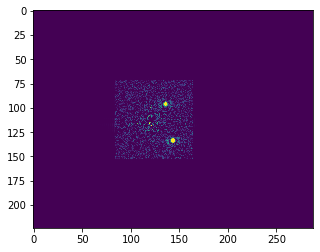

In [14]:
plt.figure()
plt.imshow(subtracted_image,vmin = 0, vmax = 10,interpolation ="none")

Here we see that Klip has successfully made a synthetic psf reference image which was subtracted from the target PSF - indeed, we see that we recover the two companions that we injected into the target PSF

<a id="future_testing"></a>
## Testing Needed in the Near Future 

- The outlier_detection step will be tested in '0.17.1' ain conjunction with the three steps above
- Need to generate similar datasets for LYOT and the two other 4QPMs, and verify that the updates I made to the other PSFMASK reference files will perform as expected. The current PSFMASK reference files for MIRI are incorrect (wrong shape and not centered correctly around the coronagraphic obstruction)
- Need to properly test the 'resample' step in calcoron3 using a psf target with a fake companion injection, with target images taken at two different orientations. Using WCS header info, the resample step should correctly combine the two subtracted images (i.e. derotating and combining them correctly). 

<a id="about_ID"></a>
## About this Notebook
**Author:** J. Brendan Hagan, Staff Scientist, MIRI Branch
<br>**Updated On:** 09/23/2020